Cracking the Cucumber Code: Predicting Disease with the Powerful CNN Model

Course Title: machine learning (CSE-475)

Submitted To: Dr. Mohammad Rifat Ahmmad Rashid,

Assistant Professor,

Department of Computer Science & Engineering,

EWU.

Submitted By: Md. Farhad Billah,

Department of Computer Science & Engineering,

EWU.

1. Introduction

In this game chainging project, my goal is to improve the way we detect dieases in cucumber plants using CNN model. By using that model, we want to quickly and accurately identify diseases that harm cucumber crops. This project is really important because it can help farmers avoid big losses by preventing problems early on. To train our model, we have a big set of pictures of cucumbers and also it's leaf.This way, my model can learn from these pictures and make predictions with incredible accuracy. Let's go to the exciting project to portect cucumbers from harmful diseases.

2. Problem Statement

The problem I am addressing is cucumber disease prediction using CNN model. The goal is to develop a model that can accurately classify images of cucumbers as either healthy oe diseased and Leaf as either healthy or diseased.By trainig a deep convolutional neural network (CNN) model on a dataset of labeled cucumber images, I cam create a predictive model that can classify new cucumber images as healthy or diseased with high accuracy.

The FAO, in its The State of Food and Agriculture 2019 report, said agriculture in Bangladesh has been dominated by smallholder farmers and post-harvest losses in fruits and vegetables are high, ranging between 20 and 44 per cent.[i]

Text(0.5, 1.0, 'Cucumber Production in Bangladesh (2017-2021)')

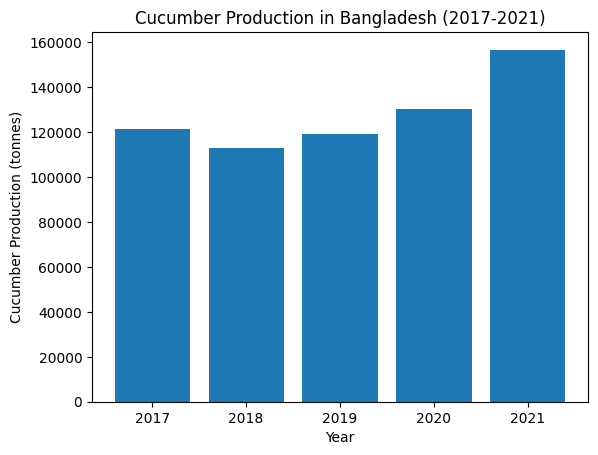

In [79]:
import matplotlib.pyplot as plt

years = [2017, 2018, 2019, 2020, 2021]
production = [121254, 112974, 119136, 130259, 156744]

plt.bar(years, production)
plt.xlabel("Year")
plt.ylabel("Cucumber Production (tonnes)")
plt.title("Cucumber Production in Bangladesh (2017-2021)")

The cucumber Production in Bangladesh (2017-2021) shaow that how many cucumber produce in bangladesh[ii]. If we can correctly diagnose cucumber diseases, we can produce more cucumbers.

3. Data Collection and Preprocessing

I downloaded my dataset for my project from the following website:https://data.mendeley.com/datasets/y6d3z6f8z9/1.

I utilized the orginal dataset, whcih is images based, for my project. Consequently, I did not need to perform any data cleaning, address missing values, or handle outliers.

4. Exploratory Data Analysis (EDA)

In [80]:
#Import The required Python libraries.
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [81]:
#here image size is 256x256
IMAGE_SIZE = 256
#every time process 32 images (41x32)~1312
BATCH_SIZE = 32
#how many color have in these pictures
CHANNELS = 3
#41x0.8~33
EPOCHS = 50

Each Image in the dataset has a fixed size of 256x256 pixels. My batch size is set at 32, whcih means the model processes 32 Images in each iteration. The dataset is in RGB color format, signifying that it has 3 color channels. Lastly, my model is trianed for a total of 50 epochs, which means it undergoes 50 complete cycles of training.

In [82]:
# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Cracking the Cucumber Code: Predicting Disease with the Powerful CNN Model/Original Image',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1289 files belonging to 8 classes.


There are a total of 1289 files distributed across 8 distinct casees.

In [83]:
class_names = dataset.class_names
class_names

['Anthracnose',
 'Bacterial Wilt',
 'Belly Rot',
 'Downy Mildew',
 'Fresh Cucumber',
 'Fresh Leaf',
 'Gummy Stem Blight',
 'Pythium Fruit Rot']

The dataset comprises 8 distinct class names, which are:

(1) Anthracnose: It is a plant disease that affects various crops, casing dark lesions on leaves, stems, and fruits.

(2) Bacterial Wilt: It is a destructive plant disease characterzed by wilting, yellowing, and rapid decline of infected plants.

(3) Belly Rot: It is a common issue in certain cucumbers, causing decay and softening of the lower portion.

(4) Downy Mildew: It is a fungal disease that often appears as white or grayish patches on the undersides of plant leaves.

(5) Fresh Cucumber: It's are crisp and refreshing vagetables that are often used in salads and pickles.

(6) Fresh Leaf: Fresh leaves are essential for photosynthesis and are crucial for growth and health of plants.

(7) Gummy Stem Blight: It is a fungal infection that affects the stems of cucurbit plants, leading to gum-like exudates.

(8) Pythium Fruit Rot: It is a plant disease caused by water molds, resulting in the decay of cucumbers.

In [84]:
# Print the dataset information
print(f"In the dataset, there are {len(dataset)} files belonging to {len(class_names)} classes.")

In the dataset, there are 41 files belonging to 8 classes.


This dataset contains a total of 41 files, each categorized into one of 8 distinct classes or categories.

In [85]:
for image_batch,label_batch in dataset.take(1):
  #processing everytime is 32, 256x256 height and weight and every
  #pictures have 3 colors which is rgb
  print(image_batch.shape)

(32, 256, 256, 3)


In [86]:
for image_batch,label_batch in dataset.take(1):
  #just convert into a list
  print(image_batch[0].numpy())

[[[154.82654  163.35364  108.256226]
  [151.47961  154.73279   65.44678 ]
  [147.37488  148.42188   71.56238 ]
  ...
  [123.25525  167.48962  152.4115  ]
  [113.16724  165.08594  152.12659 ]
  [121.011475 167.01147  164.01147 ]]

 [[102.025024 133.29224   80.868774]
  [157.16882  160.95483  101.07507 ]
  [164.91443  169.30493  101.76599 ]
  ...
  [100.859375 155.26562  143.86719 ]
  [127.51294  177.60364  172.31763 ]
  [124.85596  170.85596  167.85596 ]]

 [[107.94519  126.960815  80.91394 ]
  [131.37463  150.94531  116.98425 ]
  [151.05627  156.0144   106.04846 ]
  ...
  [108.42847  164.34534  155.7594  ]
  [ 88.57764  155.39795  153.01514 ]
  [128.35425  172.30737  172.01562 ]]

 ...

 [[112.010376 143.01038  101.010376]
  [114.046875 142.04688   94.046875]
  [111.76782  143.6897   102.6897  ]
  ...
  [ 99.71655  148.38843   97.89624 ]
  [112.140625 133.50769   94.66406 ]
  [103.69006   86.69006   77.398315]]

 [[128.36414  148.79529  104.364136]
  [133.26086  148.46399  111.86243 ]


This code takes the image_batch and converts it into a list using the 'list()' function. then, it prints the first element of the 'print()' function and accessing it with the index'[0]'. The '.numpy()' method is used to cinvert the tensor object to a numpy array for printing.

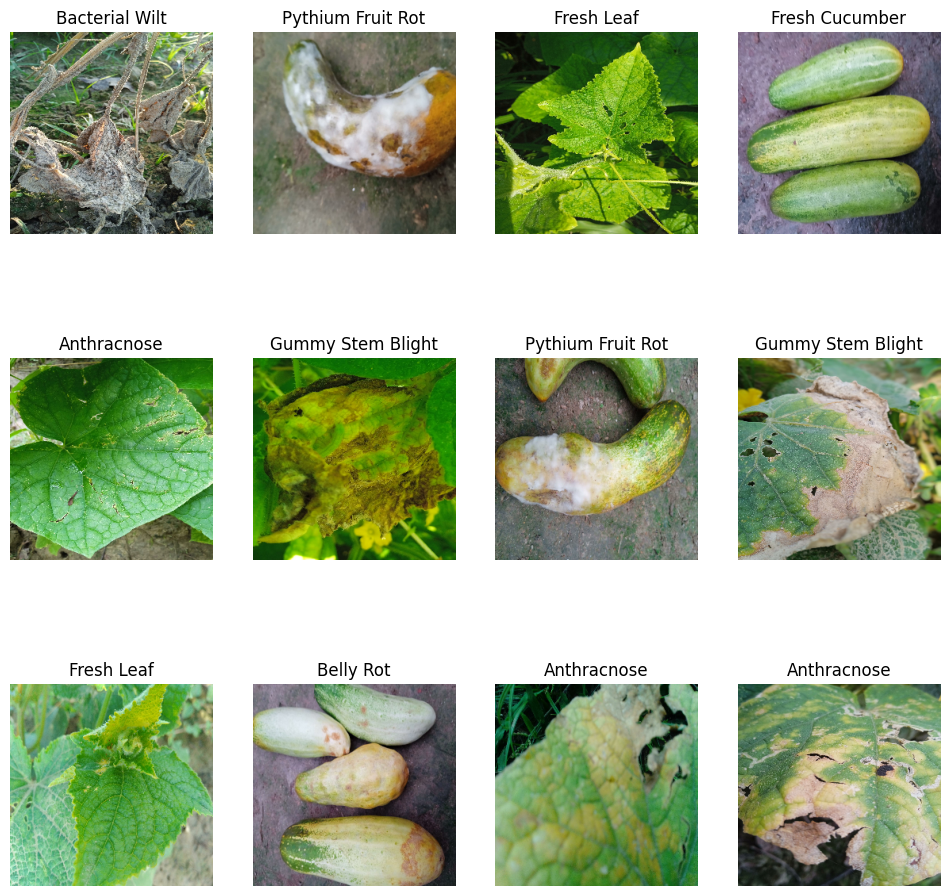

In [87]:
# Display sample images and labels
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

The Image shows a collection of various leaves and cucumbers. They are arranged in a grid, with each item labeled with it's name. The arrangment of them in a grid makes it easy for customer to compare and farmer to easy understand to which one it is a disease.

5. Methodology

Total len 41

80%==> trainig

20%==> 10% validation, 10% test[link text]

Real Time calculation

In [88]:
train_size=0.8
len(dataset)*train_size

32.800000000000004

with a datset consisting of 41 files and an 80% training size, the training dataset will contain approximately 32 images for each file.

In [89]:
#train Dataset
train_ds=dataset.take(32)
len(train_ds)

32

Here just take integer number.

In [90]:
#41-32=9
test_ds=dataset.skip(32)
len(test_ds)

9

My total file is 41 but train data is 32. Now I get test data is 9.

In [91]:
#validation dataset of 10% of the number 4
val_size=0.1
len(dataset)*val_size

4.1000000000000005

In [92]:
#here we take integer number
val_ds=test_ds.take(4)
len(val_ds)

4

Validation data is 4.

In [93]:
#14-6=8 which is test dataset of 5
test_ds=test_ds.skip(4)
len(test_ds)

5

Test dataset is 5.

In [94]:
# Split the dataset into train, validation, and test sets
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

This Python function 'get_dataset_partitions_tf' is designed to splt a dataset into three subsets: traning, validation and test dataset. It takes as input the dataset ('ds'), with optional parameters to specify the split ratios(three parameters) whether to shuffle the data ('shuffle') and the size for shuffling ('shuffle_size'). Finally, the function returns three dataset objects(three parameters). The training size is determined by 'train_split', the validation size by 'val_split' and the remaining portion is allocated to the test set.

In [95]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

I can conveniently access and work with these three subsets in my Deep Learning workflow.

In [96]:
len(train_ds)

32

In [97]:
len(val_ds)

4

In [98]:
len(test_ds)

5

In [99]:
# Prepare the data for training
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

This code takes the training, validation and test datasets and performs the following the operations:

* Caches the datasets to improve performance by keeping the data in memory.

* Shuffles the data to introduce randomness during training.

* Specifies a buffer size for shuffling, in this case, 1000.

* Prefetches the data to overlap data preprocessing and model excution, improving performance.

In [100]:
# Define the model architecture
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

In [101]:
n_classes

8

That code snippet creates a model with the specified input shape and number of classes.

6. Model Development

In [102]:

model = models.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

The code is creating a Convolutional Neural Network (CNN) model using the Keras Sequential API. Here's a breakdown of each line:

* 'python model = models.Sequential([])'. This line initializes a Sequential model, which allows us to build a neural network layer by layer.

* 'layers.experimental.preprocessingResizing(IMAGE_SIZE, IMAGE_SIZE)'. This line resizes the input Images to specified size using the 'Resizing' preprocessing layer.

* 'layers.experimental.preprocessing Rescaling(1.0/255)'. The line perfroms rescaling of pixel values to the range of [0,1] using the 'Rescaling' preprocessing layer.

* 'layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical')'. The line randomly flips input Images horizontally and vertically using the 'RandomFlip' preprocessing layer.

* 'layers.experimental.preprocessing.RandomRotation(0.2)'. This line randomly rotates input Images by a maximum of 20% using the 'RandomRotation' preprocessing layer.

* 'layers.Conv2D(32, (3, 3),activation='relu', input_shape=input_shape)'. the line adds a 2D convolutional layer with 32 filters, a filter size of 3x3, ReLU activation function and the specified input shape.

* 'layers.MaxPooling2D((2, 2))'. The line adds a max pooling layer with a pool size of 2x2.

* 'layers.Conv2D(64, kernel_size=(3, 3), activation='relu')'. The line adds another 2D convolutional layer with 64 filters, a filter size of 3x3, and ReLU activation function.

* 'layers.MaxPooling2D((2, 2))'. The line adds another max pooling layer with a pool size of 2x2.

* The above pattern of adding convolutional and max pooling layers is repeated several times to exract features from the input Images.

* 'layers.Flatten()'. this line flattens the output from the previous layers into a 1D array.

* 'layers.Dense(64, activation='relu')'. the line adds a fully connected layer with 64 units and ReLU activation function.

* 'layers.Dense(n_classes,activation='softmax')'. The line adds the fully connected layer with a number of units equal to the number of classes in our dataset and softmax activation function. It outputs the predicted probabilities for each class.

The model is now ready for raining and prediction.

In [103]:

model.build(input_shape=input_shape)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In this code, I am building and compiling a Neural Network modle using the TensorFlow library.

7. Model Training

In [104]:
# Train the model
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
32/32 [==============================] - 48s 806ms/step - loss: 1.9667 - accuracy: 0.2018 - val_loss: 1.7005 - val_accuracy: 0.2891
Epoch 2/50
32/32 [==============================] - 2s 60ms/step - loss: 1.7250 - accuracy: 0.2937 - val_loss: 1.7583 - val_accuracy: 0.2969
Epoch 3/50
32/32 [==============================] - 2s 59ms/step - loss: 1.5044 - accuracy: 0.3926 - val_loss: 1.3802 - val_accuracy: 0.4688
Epoch 4/50
32/32 [==============================] - 2s 58ms/step - loss: 1.4601 - accuracy: 0.3946 - val_loss: 1.4006 - val_accuracy: 0.4688
Epoch 5/50
32/32 [==============================] - 2s 61ms/step - loss: 1.3994 - accuracy: 0.4346 - val_loss: 1.2817 - val_accuracy: 0.4609
Epoch 6/50
32/32 [==============================] - 2s 62ms/step - loss: 1.3054 - accuracy: 0.4675 - val_loss: 1.1658 - val_accuracy: 0.5312
Epoch 7/50
32/32 [==============================] - 2s 59ms/step - loss: 1.2670 - accuracy: 0.4795 - val_loss: 1.3260 - val_accuracy: 0.4453
Epoch 8/50


Within each epoch, I can perform the training on batches of Images. After completing the training for each atch, I calculate the loss and accuracy for both the training and validation dataset.

8. Model Evaluation

In [105]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss: ", scores[0])
print("Test Accuracy: ", scores[1])

5/5 [==============================] - 21s 29ms/step - loss: 0.4861 - accuracy: 0.8500
Test Loss:  0.4861220717430115
Test Accuracy:  0.8500000238418579


After evaluting the model, it achieved a training loss of 0.4861 and training accuracy of 85.00%. The model's performance on the test dataset resulted in a test loss of approximately 0.4861 and a test accuracy of roughly 85%.

In [106]:
#here is these what are calculated by
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In this model, I calculate loss, accuracy, val_loss, val_accuracy.

9. Results and Discussion

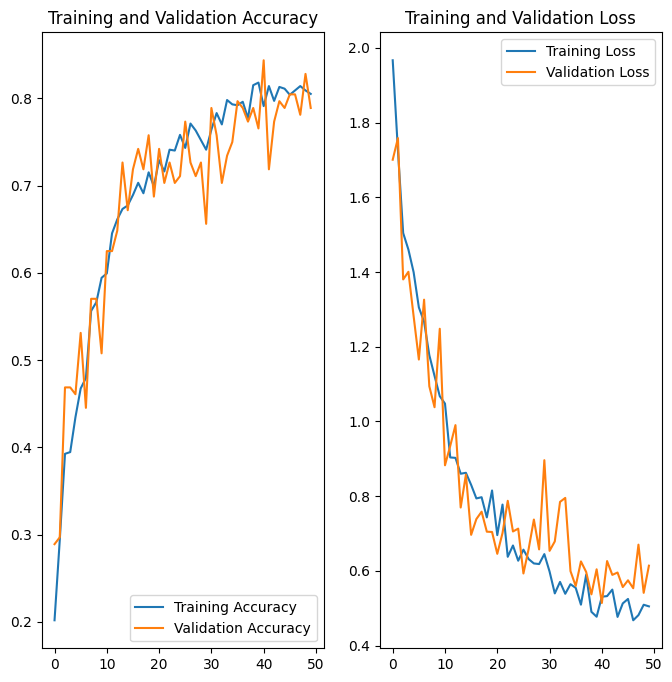

In [107]:
# Plot the training and validation metrics
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

The graph shows a comparison between two sets of data, one representing training and validation accuracy and the other representing training and validation loss. The training accuracy is depicted by a blue line, while the validation accuracy is represented by an orange line. The graph demonstrates how the training and validation accuracy and loss change over time, provideing insights into the performance of the model during the training process.

Train and Validation Learning Curves Showing a Validation Dataset That is too Small Relative to the Training Dataset.

In [108]:
# Make predictions
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

The function then returns the predicted class and its associated confidence level as a tuple.

First image to predict
Actual label: Gummy Stem Blight
1/1 [==============================] - 0s 123ms/step
predicted Label:  Gummy Stem Blight


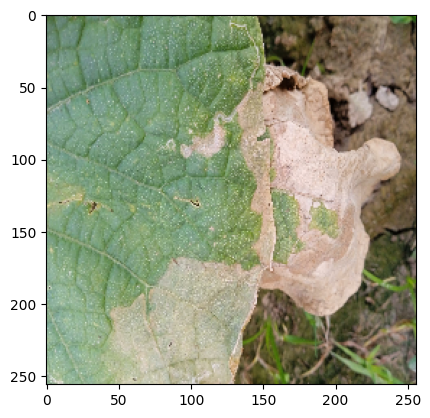

In [109]:
#
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print('First image to predict')
  plt.imshow(first_image)
  print('Actual label:',class_names[first_label])

  batch_prediction=model.predict(images_batch)
  print('predicted Label: ',class_names[np.argmax(batch_prediction[0])])

Randomly select an image from the dataset and make predictions using the provided function.

In [110]:
import numpy as np
plt.figure(figsize=(15,15))
for images_batch, labels_batch in test_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images_batch[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images_batch[i].numpy())
        actual_class = class_names[labels_batch[i]]

        plt.title(f'Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}')

        plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

The image contains a diverse assortment of cucumbers and leaves, showcasing cucumbers in different states, including ripe, rotten, and partially eaten. For each item in the image, the function provides the actual name, the predicted class, and the associated confidence value.

In [111]:
# Make predictions on the test dataset
test_predictions = model.predict(test_ds)

5/5 [==============================] - 0s 25ms/step


My Precision value is 0.142594, Recall value is 0.142596 and F1 score is 0.140951

In [112]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels and predicted labels
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
predicted_labels = np.argmax(test_predictions, axis=1)

In [113]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4 5 1 2 1 3 1 2]
 [3 1 7 1 4 2 4 7]
 [2 5 3 3 2 5 4 2]
 [0 1 1 2 0 1 3 3]
 [1 7 1 0 3 1 1 1]
 [3 3 5 0 1 3 1 1]
 [4 2 1 3 2 1 2 5]
 [4 3 6 1 0 5 1 3]]


In [114]:
# Calculate Precision, Recall, and F1 Score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.21      0.20        19
           1       0.04      0.03      0.04        29
           2       0.12      0.12      0.12        26
           3       0.17      0.18      0.17        11
           4       0.23      0.20      0.21        15
           5       0.14      0.18      0.16        17
           6       0.12      0.10      0.11        20
           7       0.12      0.13      0.13        23

    accuracy                           0.13       160
   macro avg       0.14      0.14      0.14       160
weighted avg       0.13      0.13      0.13       160



10. Conclusion

Cucumber disease prediction using Deep Learning model is a valuable application in agriculture. By leveraging Image data and advanced Neural Networks, we can accurately identify and classify various diseases affecting cucmbers. This technology empowers with early detection, allowing for timely intervention and optimized crop management. As we continue to refine these model and integrate them into agricultural practices, we can improve crop yield, minimize losses and ultimately enhance food security.

References

i.https://businesspostbd.com/back/2021-09-07/one-third-of-bangladesh-s-vegetables-fruits-go-to-waste-26905#:~:text=The%20FAO%2C%20in%20its%20The,20%20and%2044%20per%20cent. ii.https://en.wikipedia.org/wiki/List_of_countries_by_cucumber_production#:~:text=The%20estimated%20total%20world%20production,territories%20are%20shown%20in%20italics.

